In [2]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [3]:
# Import test and train datasets
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# View first lines of training data
df_train.head(n=4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S


In [4]:
# View first lines of test data
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# use the DataFrame .info() method to check out data types, missing values
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
# use the DataFrame .describe() method to check out summary statistics of numeric columns (of df_train)
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# get cardinality of the columns
df_train.apply(pd.Series.nunique)

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

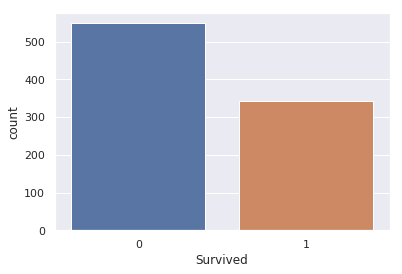

In [8]:
# use seaborn to build a bar plot of Titanic survival, which is your target variable
sns.countplot(x='Survived', data=df_train);
#Take-away: in the training set, less people survived than didn't

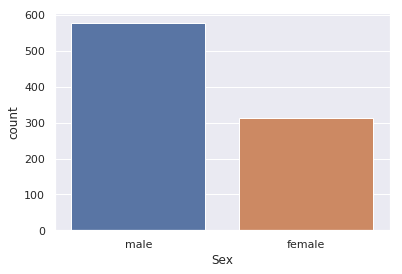

In [9]:
# use seaborn to build a bar plot of the Titanic dataset feature 'Sex' (of df_train)
sns.countplot(x='Sex', data=df_train);

/home/sunil/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


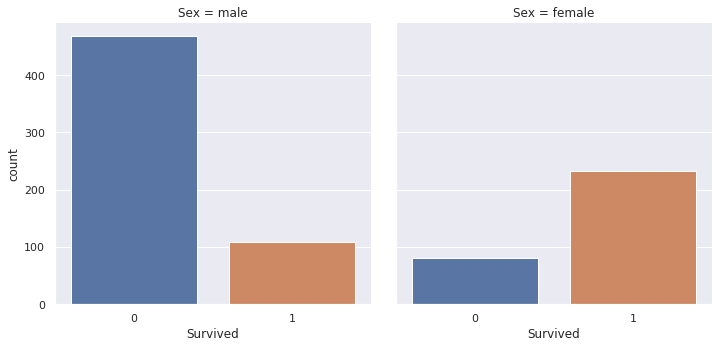

In [10]:
# use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Sex'
sns.factorplot(x='Survived', col='Sex', kind='count', data=df_train)
# Take-away: Women were more likely to survive than men

In [11]:
# use pandas to figure out how many women and how many men survived
df_train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

/home/sunil/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


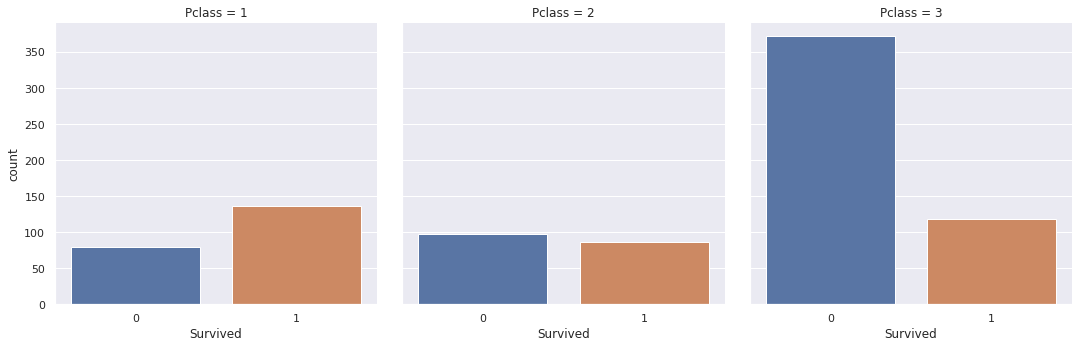

In [12]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Pclass'
sns.factorplot(x='Survived', col='Pclass', kind='count', data=df_train);
#Take-away: Passengers that travelled in first class were more likely to survive. 
#On the other hand, passengers travelling in third class were more unlikely to survive.

/home/sunil/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


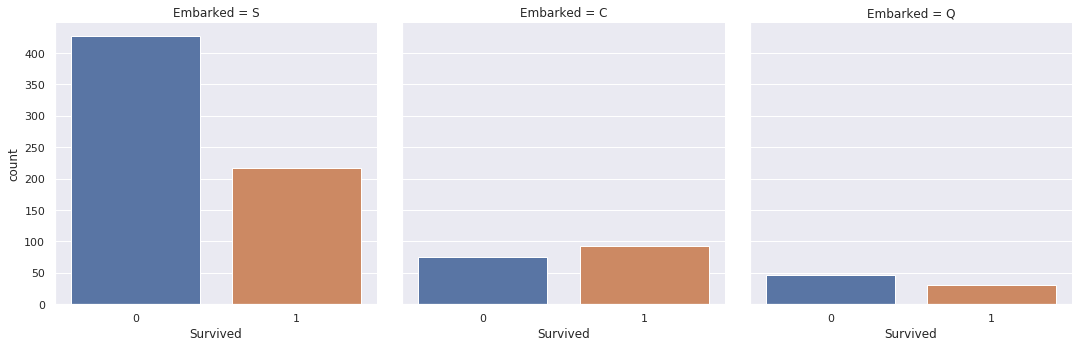

In [13]:
# Use seaborn to build bar plots of the Titanic dataset feature 'Survived' split (faceted) over the feature 'Embarked'
sns.factorplot(x='Survived', col='Embarked', kind='count', data=df_train)
# Take-away: Passengers that embarked in Southampton were less likely to survive.

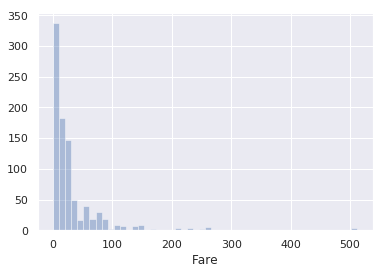

In [14]:
# Use seaborn to plot a histogram of the 'Fare' column of df_train
sns.distplot(df_train.Fare, kde=False)
# Take-away: Most passengers paid less than 100 for travelling with the Titanic

Survived
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

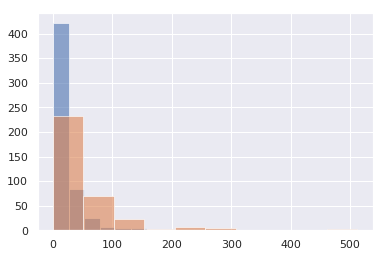

In [20]:
# Use a pandas plotting method to plot the column 'Fare' for each value of 'Survived' on the same plot.
df_train.groupby('Survived').Fare.hist(alpha=0.6)
# Take-away: It looks as though those that paid more had a higher chance of surviving.

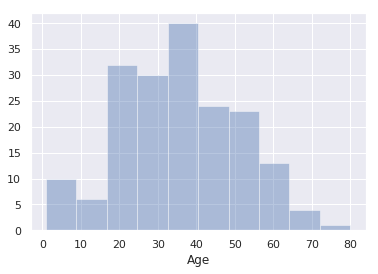

In [21]:
#Use seaborn to plot a histogram of the 'Age' column of df_train. You'll need to drop null values before doing so
df_train_drop = df_train.dropna()
sns.distplot(df_train_drop.Age, kde=False);

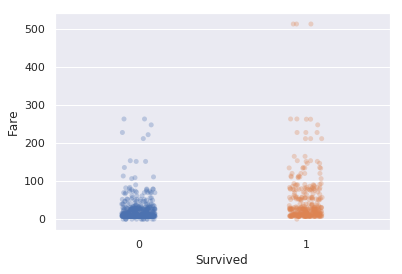

In [22]:
# Plot a strip plot & a swarm plot of 'Fare' with 'Survived' on the x-axis
sns.stripplot(x='Survived', y='Fare', data=df_train, alpha=0.3, jitter=True)

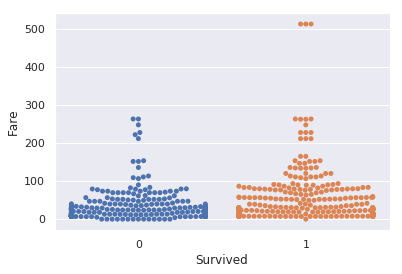

In [23]:
sns.swarmplot(x='Survived', y='Fare', data=df_train)
# Take-away: Fare definitely seems to be correlated with survival aboard the Titanic.

In [24]:
# Use the DataFrame method .describe() to check out summary statistics of 'Fare' as a function of survival
df_train.groupby('Survived').Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Survived,,,,,,,,
0,549.0,22.117887,31.388207,0.0,7.8542,10.5,26.0,263.0000
1,342.0,48.395408,66.596998,0.0,12.4750,26.0,57.0,512.3292


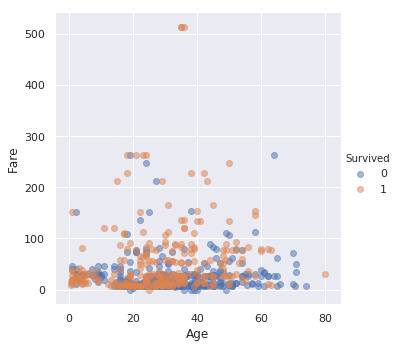

In [25]:
# Use seaborn to plot a scatter plot of 'Age' against 'Fare', colored by 'Survived'
sns.lmplot(x='Age', y='Fare', hue='Survived', data=df_train, fit_reg=False, scatter_kws={'alpha':0.5})
# Take-away: It looks like those who survived either paid quite a bit for their ticket or they were young

/home/sunil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sunil/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


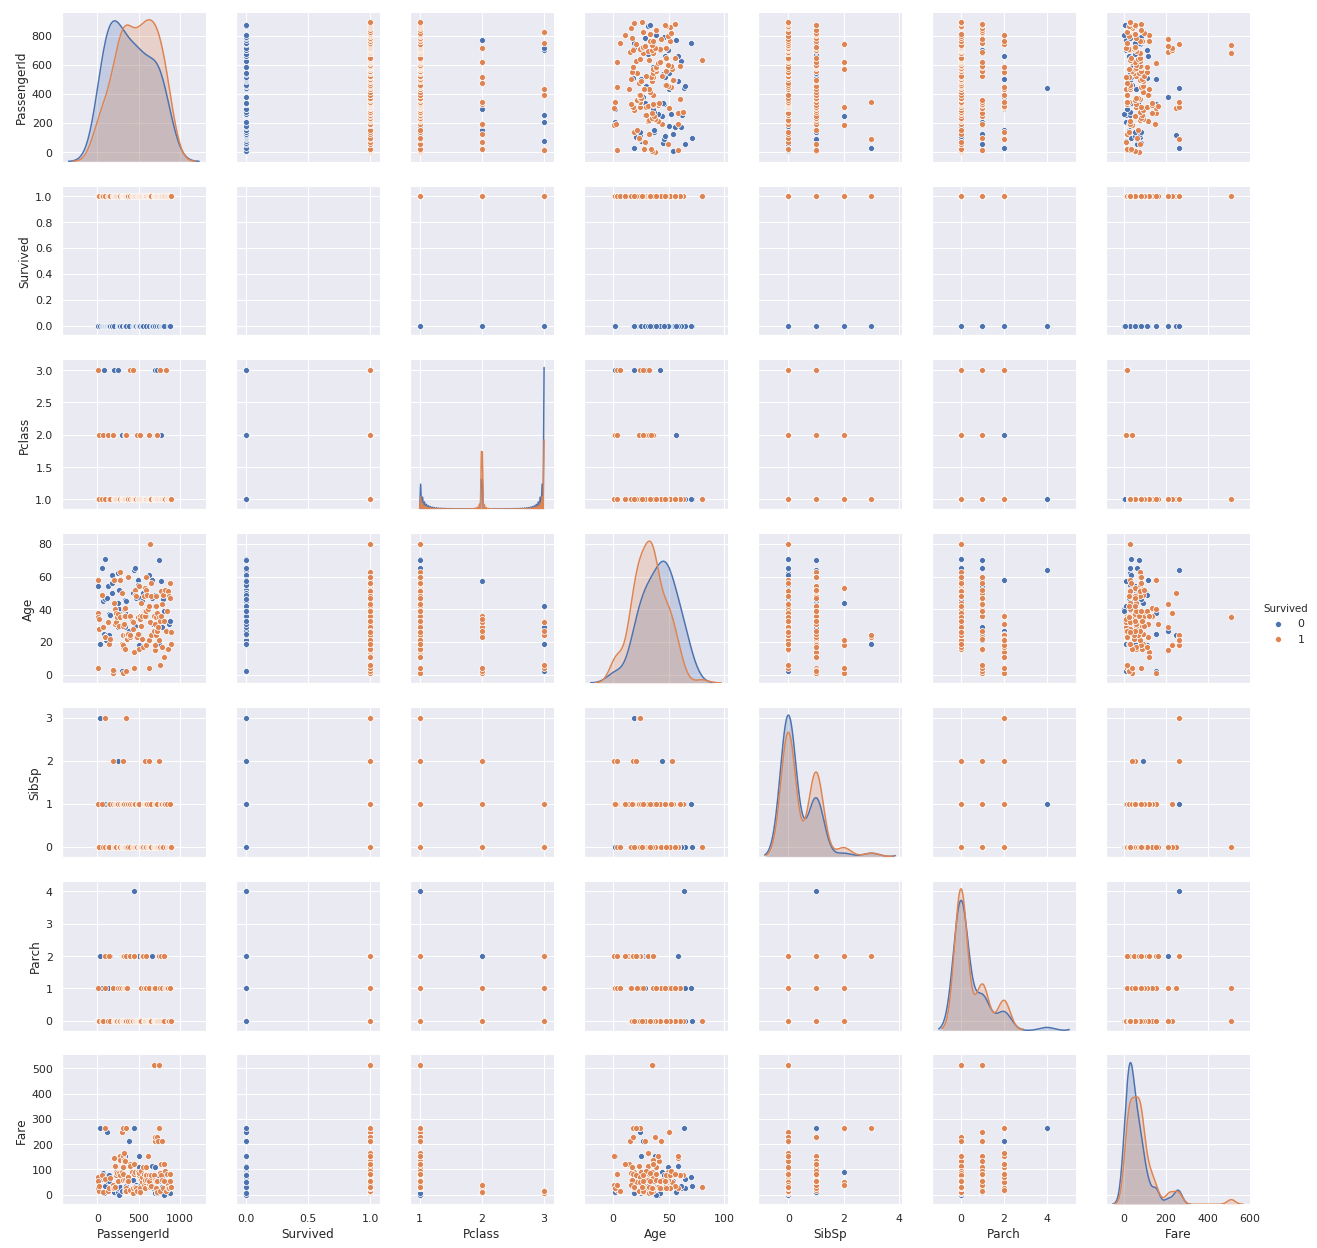

In [26]:
# Use seaborn to create a pairplot of df_train, colored by 'Survived'. 
# A pairplot is a great way to display most of the information that you have already 
# discovered in a single grid of plots.
sns.pairplot(df_train_drop, hue='Survived')